<a href="https://colab.research.google.com/github/IzhanAli08/Knowledge_Tracing/blob/main/Assisst2015Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

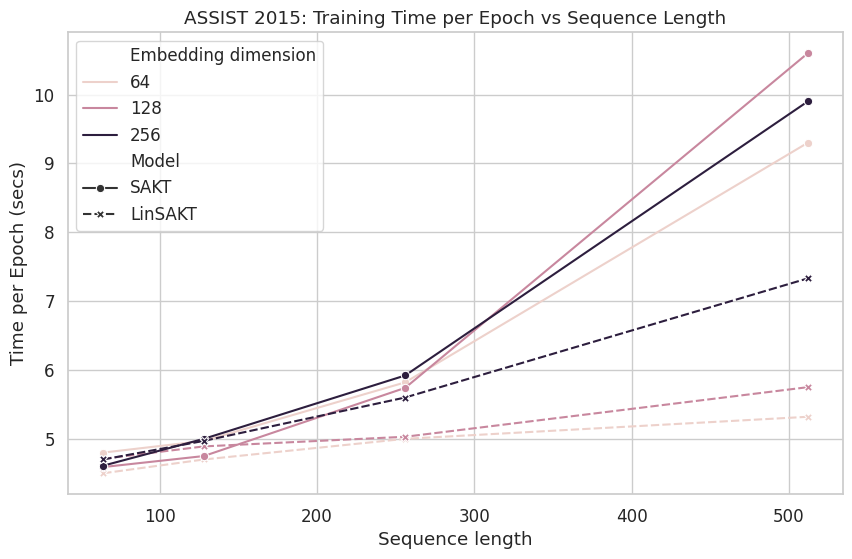

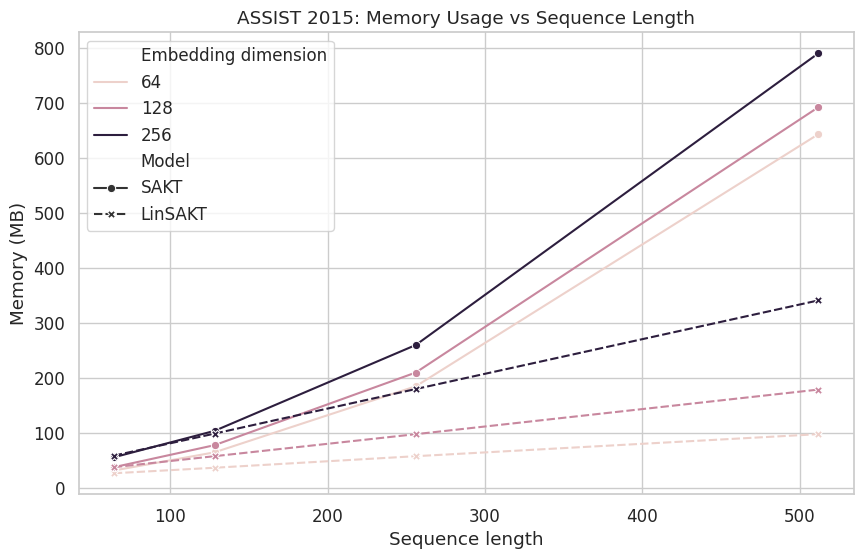

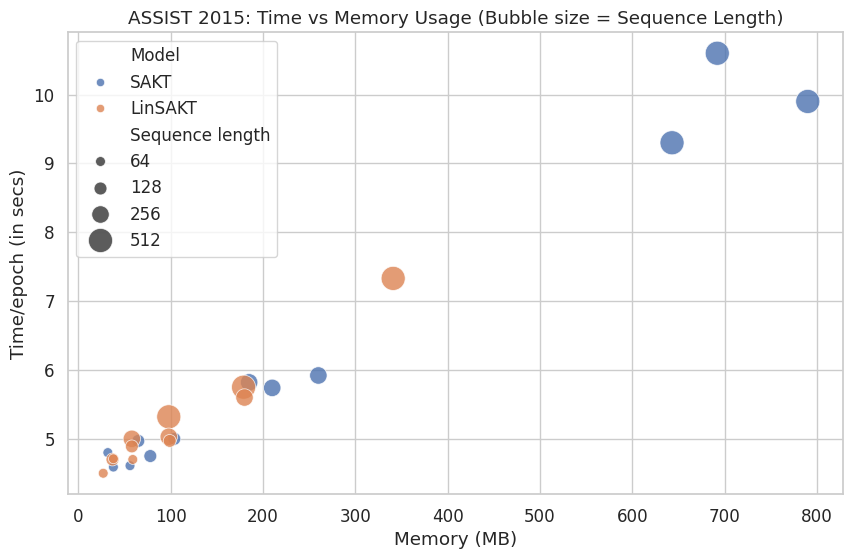

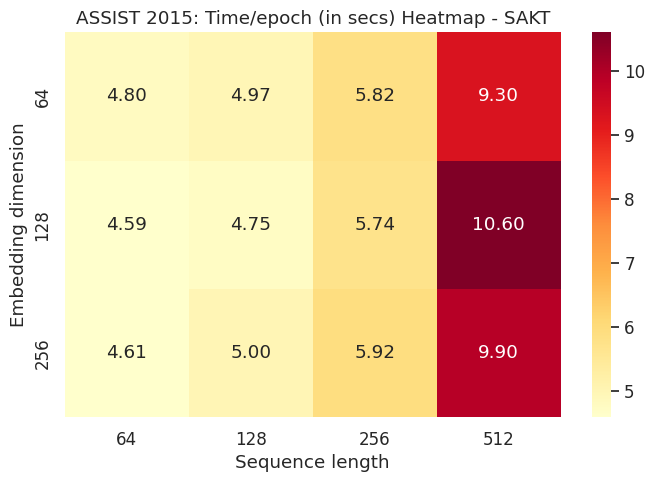

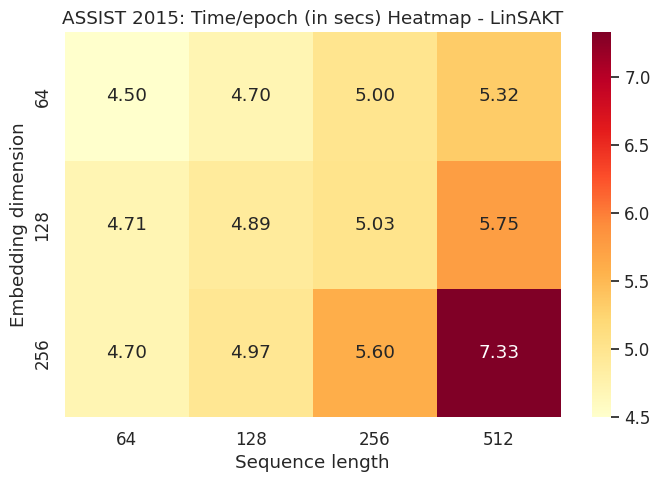

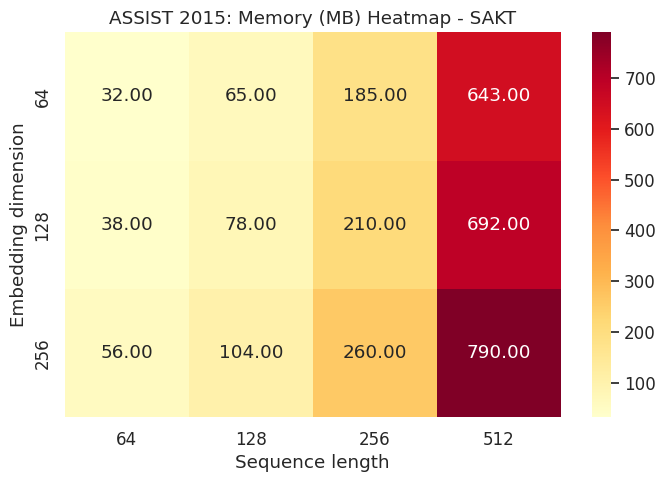

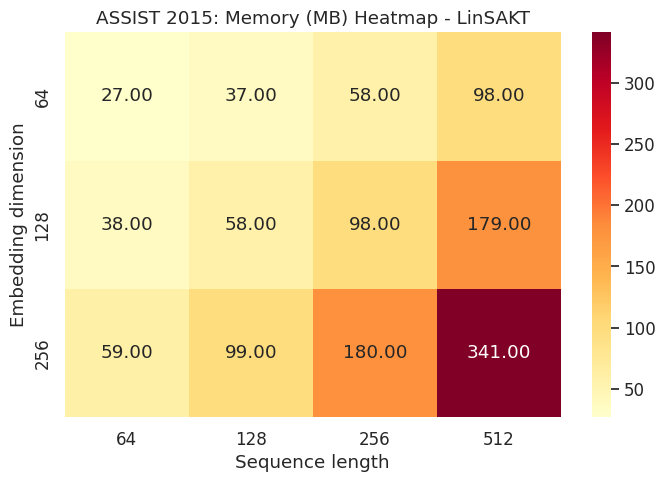

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# ASSIST 2015 dataset
data = StringIO("""
Model,Embedding dimension,Sequence length,AUC,Accuracy,Precision,Recall,F1-score,Time/epoch (in secs),Memory (MB)
SAKT,64,64,0.72,0.76,0.78,0.95,0.85,4.80,32
SAKT,64,128,0.72,0.76,0.77,0.95,0.85,4.97,65
SAKT,64,256,0.72,0.75,0.77,0.95,0.85,5.82,185
SAKT,64,512,0.72,0.75,0.77,0.95,0.85,9.30,643
SAKT,128,64,0.71,0.76,0.78,0.94,0.85,4.59,38
SAKT,128,128,0.71,0.75,0.77,0.94,0.85,4.75,78
SAKT,128,256,0.72,0.75,0.77,0.94,0.85,5.74,210
SAKT,128,512,0.71,0.75,0.77,0.94,0.85,10.6,692
SAKT,256,64,0.71,0.75,0.78,0.93,0.85,4.61,56
SAKT,256,128,0.71,0.75,0.78,0.93,0.85,5.00,104
SAKT,256,256,0.71,0.75,0.78,0.93,0.85,5.92,260
SAKT,256,512,0.72,0.75,0.78,0.93,0.85,9.90,790
LinSAKT,64,64,0.72,0.76,0.78,0.95,0.85,4.50,27
LinSAKT,64,128,0.72,0.75,0.77,0.95,0.85,4.70,37
LinSAKT,64,256,0.71,0.75,0.77,0.95,0.85,5.00,58
LinSAKT,64,512,0.72,0.75,0.77,0.95,0.85,5.32,98
LinSAKT,128,64,0.72,0.76,0.78,0.94,0.85,4.71,38
LinSAKT,128,128,0.72,0.76,0.77,0.95,0.85,4.89,58
LinSAKT,128,256,0.72,0.75,0.77,0.94,0.85,5.03,98
LinSAKT,128,512,0.72,0.76,0.77,0.95,0.86,5.75,179
LinSAKT,256,64,0.72,0.76,0.77,0.95,0.86,4.70,59
LinSAKT,256,128,0.72,0.76,0.77,0.95,0.86,4.97,99
LinSAKT,256,256,0.72,0.76,0.76,0.94,0.86,5.60,180
LinSAKT,256,512,0.72,0.75,0.77,0.95,0.86,7.33,341
""")

df = pd.read_csv(data)

sns.set(style="whitegrid", font_scale=1.1)

# 1. Training Time vs Sequence Length
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Sequence length", y="Time/epoch (in secs)",
             hue="Embedding dimension", style="Model", markers=True)
plt.title("ASSIST 2015: Training Time per Epoch vs Sequence Length")
plt.ylabel("Time per Epoch (secs)")
plt.show()

# 2. Memory Usage vs Sequence Length
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Sequence length", y="Memory (MB)",
             hue="Embedding dimension", style="Model", markers=True)
plt.title("ASSIST 2015: Memory Usage vs Sequence Length")
plt.ylabel("Memory (MB)")
plt.show()

# 3. Time vs Memory Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Memory (MB)", y="Time/epoch (in secs)",
                hue="Model", size="Sequence length", sizes=(50, 300), alpha=0.8)
plt.title("ASSIST 2015: Time vs Memory Usage (Bubble size = Sequence Length)")
plt.show()

# 4. Heatmaps for Time and Memory
for metric in ["Time/epoch (in secs)", "Memory (MB)"]:
    for model in df["Model"].unique():
        pivot_df = df[df["Model"] == model].pivot(index="Embedding dimension", columns="Sequence length", values=metric)
        plt.figure(figsize=(8,5))
        sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlOrRd")
        plt.title(f"ASSIST 2015: {metric} Heatmap - {model}")
        plt.show()